In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_pickle('data_preprocessing.pkl')

In [3]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Month,Day,Hour,Minute
0,18,Website,Sales-Agent-11,Other Locations,Mode-5,Low Potential,11,14,10,5
1,18,Website,Sales-Agent-10,Other Locations,Mode-5,Low Potential,11,14,9,22
2,18,Website,Sales-Agent-10,Other Locations,Mode-5,Low Potential,11,14,9,21
3,18,Website,Sales-Agent-10,Other Locations,Mode-5,Low Potential,11,14,8,46
4,18,Website,Sales-Agent-10,Other Locations,Mode-5,Low Potential,11,14,7,34
...,...,...,...,...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,Low Potential,4,28,9,45
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,Low Potential,4,28,9,43
7419,5,Live Chat,Sales-Agent-11,Bangalore,Mode-1,Low Potential,4,28,9,20
7420,21,Existing Customer,Sales-Agent-4,Other Locations,Mode-1,Low Potential,4,28,8,4


### Feature Engineering

In [4]:
# From correlation we got to know which features are least correlated with target so we will drop them 

In [5]:
data.drop(['Day','Hour','Minute'],axis =1, inplace =True)

In [6]:
# Handling Outlier 

In [7]:
# Product id column 

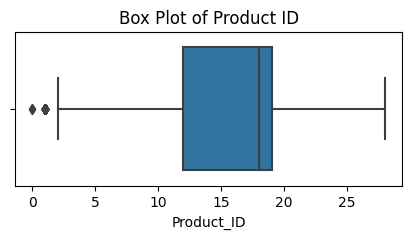

In [8]:
plt.figure(figsize=(5,2)) 
sns.boxplot(x='Product_ID', data=data)
plt.title('Box Plot of Product ID')  
plt.show()

In [9]:
q1 = data['Product_ID'].quantile(0.25)
q3 = data['Product_ID'].quantile(0.75)
IQR = q3 - q1 

In [10]:
lower = q1 - (1.5*IQR)
upper = q3 + (1.5*IQR)

In [11]:
data[data['Product_ID']< lower]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Month
272,1,Website,Sales-Agent-3,Bangalore,Mode-1,Low Potential,11
275,1,Live Chat,Sales-Agent-9,Chennai,Mode-3,Low Potential,11
423,1,Live Chat,Sales-Agent-3,Pune,Mode-3,Low Potential,10
454,1,Call,Sales-Agent-11,Other Locations,Mode-5,Low Potential,10
581,1,Live Chat,Sales-Agent-5,Hyderabad,Mode-3,High Potential,10
...,...,...,...,...,...,...,...
7112,1,Website,Sales-Agent-3,Chennai,Mode-1,Low Potential,5
7138,1,Live Chat,Sales-Agent-3,Bangalore,Mode-1,Low Potential,5
7151,1,Live Chat,Sales-Agent-2,Chennai,Mode-1,Low Potential,5
7283,1,Call,Sales-Agent-11,Other Locations,Mode-5,Low Potential,5


In [12]:
data[data['Product_ID']>upper]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Month


In [13]:
data.loc[data['Product_ID'] < lower,'Product_ID'] = data['Product_ID'].median()

In [14]:
data[data['Product_ID']<lower]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Month


In [15]:
# month column 

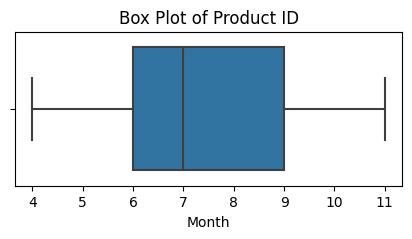

In [16]:
plt.figure(figsize=(5,2)) 
sns.boxplot(x='Month', data=data)
plt.title('Box Plot of Product ID')  
plt.show()

In [17]:
# no outliers in month column 

In [18]:
# mapping columns 

In [19]:
data['Status'] = data['Status'].map({'High Potential': 1, 'Low Potential': 0})


In [20]:
data['Status'].value_counts()

Status
0    4571
1    2849
Name: count, dtype: int64

In [21]:
data['Sales_Agent'].value_counts()

Sales_Agent
Sales-Agent-4     1523
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      47
Sales-Agent-1        4
Name: count, dtype: int64

In [22]:
sales_agent_mapping = {
    'Sales-Agent-4': 0,
    'Sales-Agent-11': 1,
    'Sales-Agent-5': 2,
    'Sales-Agent-9': 3,
    'Sales-Agent-3': 4,
    'Sales-Agent-7': 5,
    'Sales-Agent-2': 6,
    'Sales-Agent-12': 7,
    'Sales-Agent-6': 8,
    'Sales-Agent-8': 9,
    'Sales-Agent-10': 10,
    'Sales-Agent-1': 11
}

data['Sales_Agent'] = data['Sales_Agent'].map(sales_agent_mapping)

print(data['Sales_Agent'].head())


0     1
1    10
2    10
3    10
4    10
Name: Sales_Agent, dtype: int64


In [23]:
data['Delivery_Mode'].value_counts()

Delivery_Mode
Mode-5    2973
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: count, dtype: int64

In [24]:
delivery_mode_mapping = {
    'Mode-5': 0,
    'Mode-1': 1,
    'Mode-3': 2,
    'Mode-4': 3,
    'Mode-2': 4
}

data['Delivery_Mode'] = data['Delivery_Mode'].map(delivery_mode_mapping)

print(data['Delivery_Mode'].head())

0    0
1    0
2    0
3    0
4    0
Name: Delivery_Mode, dtype: int64


In [25]:
# Applying ohe to columns location and source 

In [26]:
data = pd.get_dummies(data, columns=['Location','Source'], prefix=['Location','Source']).astype(int)


In [27]:
# Applying Scaling to numerical columns

In [28]:
columns_to_scale = ['Product_ID','Month']
scaler = MinMaxScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

data[columns_to_scale].head()

,Product_ID,Month
0,0.615385,1.0
1,0.615385,1.0
2,0.615385,1.0
3,0.615385,1.0
4,0.615385,1.0


In [29]:
data.to_pickle('data_feature_engineering.pkl')